In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1:

Consider a linear inverse problem
$$
Ku = f^{\delta},
$$
with $f^{\delta} = K\overline u + \epsilon$, where $\epsilon$ is drawn from a normal distributed with zero mean and covariance $\Sigma_{\text{noise}}$ and $\overline u$ is drawn from a normal distributed with mean $\mu_{\text{prior}}$ and covariance $\Sigma_{\text{prior}}$.

Show that the posterior distribution is Gaussian with mean
$$
\mu_{\text{post}} = \mu_{\text{prior}} + \left(K^T\Sigma_{\text{noise}}^{-1}K + \Sigma_{\text{prior}}^{-1}\right)^{-1}K^T\Sigma_{\text{noise}}^{-1}(f - K\mu_{\text{prior}}),
$$
and covariance
$$
\Sigma_{\text{post}} = \Sigma_{\text{prior}} - \Sigma_{\text{prior}}K^T\left(K\Sigma_{\text{prior}}K^T + \Sigma_{\text{noise}}\right)^{-1}K\Sigma_{\text{prior}}.
$$
Hint: The [Binomial inverse theorem](https://en.wikipedia.org/wiki/Woodbury_matrix_identity#Binomial_inverse_theorem) may come in handy.


## Exercise 2:
Consider a linear inverse problem $Ku = f^{\delta}$, where we assume that $f^{\delta}$ follows a Poisson distribution with mean $\overline f = K\overline{u}$.

* Show that the MAP estimate may be obtained by solving the following minimization problem
$$
\min_u \sum_i \left(({K}u)_i - f_i^\delta\ln ({K}u)_i\right).
$$

* Assuming that both $\|f^{\delta} - \overline f\|_2$ and $\|u-\overline u\|_2$ are small, show that the log-likelihood function may be approximated as
$$
\sum_i \left(({K}u)_i - f_i^\delta\ln ({K}u)_i\right) \approx \|Ku - f^{\delta}\|_{\Sigma^{-1}}^2,
$$
where $\Sigma$ is a diagonal matrix with elements $1/\overline f_i$.

* In practice, we would replace $\overline f_i$ by $f_i^{\delta}$ for the covariance and thus approximate the Poisson map estimate as a weighted least-squares MAP estimate. Explain why this quadratic approximation makes sense heuristically.

## Exercise 3:
Consider the inverse problem
$$
Ku = f^{\delta},
$$
where
$$Ku(x) = \int_0^1 u(x')e^{-d(x-x')^2} \mathrm{d}x',$$
and
$$
f^{\delta} = K\overline{u} + \epsilon.
$$
Generate $\overline u \in \mathbb{R}^n$ as Gaussian random fields with mean zero and covariance
$$
\Sigma_{ij} = \exp\left(-\frac{|x_i-x_j|}{L}\right),
$$
and Gaussian noise, $\epsilon$, with zero mean and variance $\sigma$.


* For varying correlation length $L$ and noise level $\sigma$, reconstruct the images using the regularized pseudo inverse of $K$. How well can you reconstruct? You can draw samples from the multivariate normal distribution using `numpy.random.multivariate_normal`

* Compute the MAP estimate from
$$
\min_{u} \sigma^{-2}\|Ku - f^{\delta}\|_2^2 + \|u\|_{\Sigma^{-1}}^2.
$$
How well can you reconstruct now?

* What happens if you use two different covariance matrices for generating and reconstructing $u$?


In [4]:
def getK(n):
    h = 1/n;
    d = 1e3;
    x = np.linspace(h/2,1-h/2,n)
    xx,yy = np.meshgrid(x,x)
    K = np.exp(-d*(xx-yy)**2)
    
    return K,x

In [12]:
n = 100
sigma = 1e-1
L = 1

K,x = getK(n)

C = np.exp(-np.abs(np.outer(x,np.ones(n)) - np.outer(np.ones(n),x))/L)

u = np.random.multivariate_normal(np.zeros(n),C)
noise = sigma*np.random.randn(n)
f = K@u + noise

In [16]:
ut = np.linalg.solve((1/sigma**2)*K.T@K + np.identity(n), (1/sigma**2)*K.T@f)

In [17]:
uh = np.linalg.solve((1/sigma**2)*K.T@K + np.linalg.inv(C), (1/sigma**2)*K.T@f)

NameError: name 'uty' is not defined

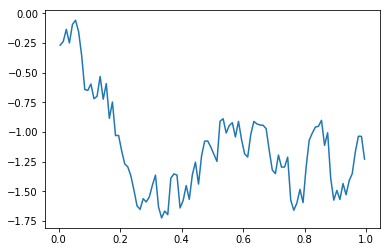

In [20]:
plt.plot(x,u,label='ground truth')
plt.plot(x,uty,label='Tikhonov reconstruction')
plt.plot(x,uh,label='Bayes reconstruction')
plt.legend()